In [ ]:
!nvidia-smi

Thu Jul  2 04:19:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!pip install gdown

In [ ]:
!gdown 'https://drive.google.com/uc?id=1GPMVBE9LqpdlVwzbhcPCAmIsstzfk5Ee'
# https://drive.google.com/file/d/1GPMVBE9LqpdlVwzbhcPCAmIsstzfk5Ee/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1GPMVBE9LqpdlVwzbhcPCAmIsstzfk5Ee
To: /content/Copy of shopee-product-detection-dataset.zip
10.1GB [03:41, 45.5MB/s]


In [ ]:
!unzip '/content/Copy of shopee-product-detection-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/train/40/238399dc6718dfb872962b649c5b8b83.jpg  
  inflating: train/train/40/23a2c307f8a05a1e21eb32f56e101ed9.jpg  
  inflating: train/train/40/23ad693e18e097185d1244374ba769cc.jpg  
  inflating: train/train/40/23bd6cca1e919689206f92388b44d325.jpg  
  inflating: train/train/40/23c7beac3cdafe529351114903c59fce.jpg  
  inflating: train/train/40/23e8212b6432efd9425f3892f4027352.jpg  
  inflating: train/train/40/23ff069da9e694541c35444ebc7f21a7.jpg  
  inflating: train/train/40/2418076cb2f41c86fa1e91b385768093.jpg  
  inflating: train/train/40/2437204a3cfe46b863373820961d0d46.jpg  
  inflating: train/train/40/24378c3a9bf723b99e05757fedb1ea87.jpg  
  inflating: train/train/40/243794ebb1e40d23766b818ab8aefb87.jpg  
  inflating: train/train/40/243b97396484342838071f927958b010.jpg  
  inflating: train/train/40/244afd9ab1567d9dfe06b5ed098c0f60.jpg  
  inflating: train/train/40/24795c07a2ff098234ee1e78a2933e8f.jpg  
  inflating

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.metrics import confusion_matrix

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm, tqdm_notebook
import os, random
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from sklearn.utils import shuffle

import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.basic_train import *
from fastai.vision.learner import *
# using fastai widget to do data cleaning
from fastai.widgets import *

fastai.__version__

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything(42)

In [ ]:
data_root = "/content/"
model_root = "/content/drive/My Drive/Shopee Product Detection/models/"
train_dir = data_root + "train/train/"
test_dir = data_root + "test/test/"
train_csv_dir = data_root + "train.csv"
test_csv_dir = data_root + "test.csv"

train_csv = pd.read_csv(train_csv_dir)
train_copy = train_csv
train_copy['category2'] = train_copy['category'].apply(lambda x: '{0:0>2}'.format(x))
cols = ['category2','filename']
train_copy['path']=train_copy[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
train_copy.head()

,filename,category,category2,path
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3,03,03/45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3,03,03/f74d1a5fc2498bbbfa045c74e3cc333e.jpg
2,f6c172096818c5fab10ecae722840798.jpg,3,03,03/f6c172096818c5fab10ecae722840798.jpg
3,251ffd610399ac00fea7709c642676ee.jpg,3,03,03/251ffd610399ac00fea7709c642676ee.jpg
4,73c7328b8eda399199fdedec6e4badaf.jpg,3,03,03/73c7328b8eda399199fdedec6e4badaf.jpg


In [ ]:
clean_csv = pd.read_csv('/gdrive/My Drive/cleaned_sort.csv')
clean_csv.head()

,name,label
0,03/e0c14f89293be7c7042d45d9e8dac67a.jpg,0
1,03/d196d41fbafaf89856b57861bf3a9b98.jpg,0
2,29/d84b12353e3347f46a7f4178f13567e2.jpg,0
3,29/767fa4d1c451e1cd605be9c146db9c12.jpg,0
4,00/d415f1f957c8f5d541b6067e3ee35141.jpg,0


In [ ]:
# get data bunch
def get_data(size,bs):
  data = ImageDataBunch.from_df(
      df = train_copy,
      ds_tfms=get_transforms(max_warp=0.1, max_zoom=1.1, max_rotate=4,max_lighting = 0.2),
      path = train_dir,
      valid_pct = 0.1,
      fn_col = 'path',
      label_col='category',
      size=size,
      bs=bs,
      resize_method = ResizeMethod.SQUISH,
      num_workers=os.cpu_count()      
  )
  data.normalize(imagenet_stats)
  return data

# show batches of images
def show_image_batch(data,rows):
  data.show_batch(rows=rows, figsize=(7,6))

# get model
def get_model():
  model = models.resnet152
  return model

# get learn
def get_learner(data,model):
  learn = cnn_learner(data, model, metrics=[accuracy,accuracy], callback_fns=ShowGraph).to_fp16()

# get recommended lr
def get_lr(learn):
  learn.lr_find()
  learn.recorder.plot(suggestion = True)


def get_data_cln(size,bs):
  data = ImageDataBunch.from_df(
      df = clean_csv,
      ds_tfms=get_transforms(max_warp=0.1, max_zoom=1.1, max_rotate=4,max_lighting = 0.2),
      path = train_dir,
      valid_pct = 0.1,
      fn_col = 'name',
      label_col='label',
      size=size,
      bs=bs,
      resize_method = ResizeMethod.SQUISH,
      num_workers=os.cpu_count()      
  )
  data.normalize(imagenet_stats)
  return data

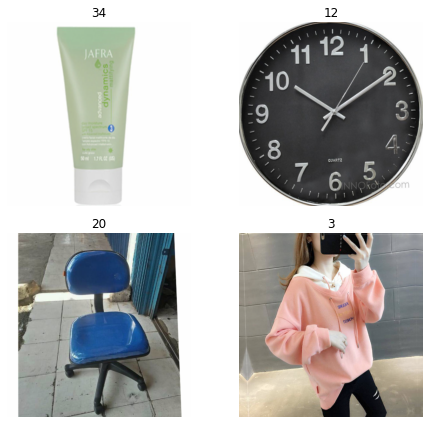

In [ ]:
clean_data = get_data_cln(512,24)
show_image_batch(clean_data,2)

In [ ]:
model = models.resnet152
top_5 = partial(top_k_accuracy, k=5)
learn = cnn_learner(clean_data, model, metrics=[accuracy, top_5], callback_fns=ShowGraph).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [ ]:
learn.model_dir = '/gdrive/My Drive/Colab Notebooks/Resnet/r152/stage2-unfreeze'
learn.load('/gdrive/My Drive/Colab Notebooks/Resnet/r152/stage2-unfreeze/r152-stage2')
learn.unfreeze()  #unfreezing the inital layers

In [ ]:
# remove zoom from FastAI TTA
tta_params = {'beta':0.12, 'scale':1.0}
submission_df = pd.read_csv('/content/test.csv')
submission_df.head()

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43


In [ ]:
learn.data.add_test(ImageList.from_df(
    submission_df, path = test_dir,
    # folder='/content/test/test/',
    # suffix='.png'
    cols=0
))

In [ ]:
preds,y = learn.TTA(ds_type=DatasetType.Test, **tta_params)

In [ ]:
submission_df.category = preds.argmax(1)
submission_df['category']=submission_df['category'].apply(lambda x: '{0:0>2}'.format(x))
# submission_df.head()
submission_df.to_csv('res152-2.csv')
!cp res152-2.csv "/gdrive/My Drive"

In [ ]:
submission_df.head()


,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,20
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,27
2,127f3e6d6e3491b2459812353f33a913.jpg,04
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,22
4,46d681a542f2c71be017eef6aae23313.jpg,12


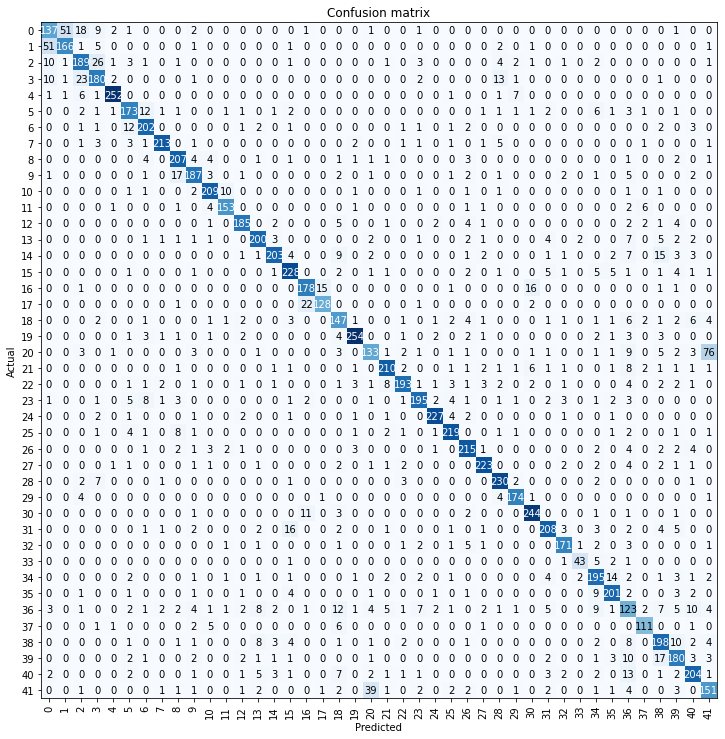

In [ ]:
from fastai.widgets import ClassConfusion
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,15))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 1.91E-05


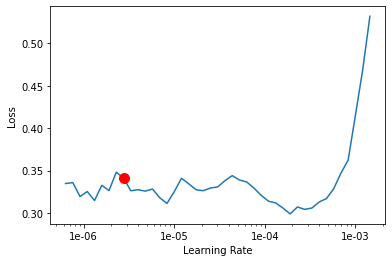

In [ ]:
get_lr(learn)

In [ ]:
clean_data = get_data_cln(600,20)
show_image_batch(clean_data,2)
model = models.resnet152
top_5 = partial(top_k_accuracy, k=5)
learn_600 = cnn_learner(clean_data, model, metrics=[accuracy, top_5], callback_fns=ShowGraph).to_fp16()

RuntimeError: ignored

In [ ]:
learn_600.model_dir = '/gdrive/My Drive/Colab Notebooks/Resnet/r152/stage3-unfreezed'
learn_600.load('/gdrive/My Drive/Colab Notebooks/Resnet/r152/stage2-unfreeze/r152-stage2')
learn_600.freeze()  #train head

In [ ]:
get_lr(learn_600)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

In [ ]:
learn_600.fit_one_cycle(1, max_lr = slice(1e-5,1e-04),callbacks=[SaveModelCallback(learn_600, every='epoch', monitor='accuracy', name='stage2_epch_')])
learn_600.save('r152-stage3')